In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [5]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [6]:
sample_data = [
    ("Laptop", 15, 999.99),
    ("Mouse", 50, 25.50),
    ("Keyboard", 30, 75.00),
    ("Monitor", 20, 299.99),
    ("Laptop", 10, 999.99),
    ("Mouse", 35, 25.50),
    ("Keyboard", 25, 75.00),
    ("Headphones", 40, 150.00)
]

In [7]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [8]:
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""

In [9]:
df = pd.read_sql_query(query, conn)

In [10]:
print("\nSales Summary by Product:")
print(df.to_string(index=False))


Sales Summary by Product:
   product  total_qty  revenue
    Laptop         25 24999.75
Headphones         40  6000.00
   Monitor         20  5999.80
  Keyboard         55  4125.00
     Mouse         85  2167.50


In [11]:
total_quantity = df['total_qty'].sum()
total_revenue = df['revenue'].sum()
print(f"\nTotal Quantity Sold: {total_quantity}")
print(f"Total Revenue: ${total_revenue:,.2f}")


Total Quantity Sold: 225
Total Revenue: $43,292.05



Chart saved as 'sales_chart.png'


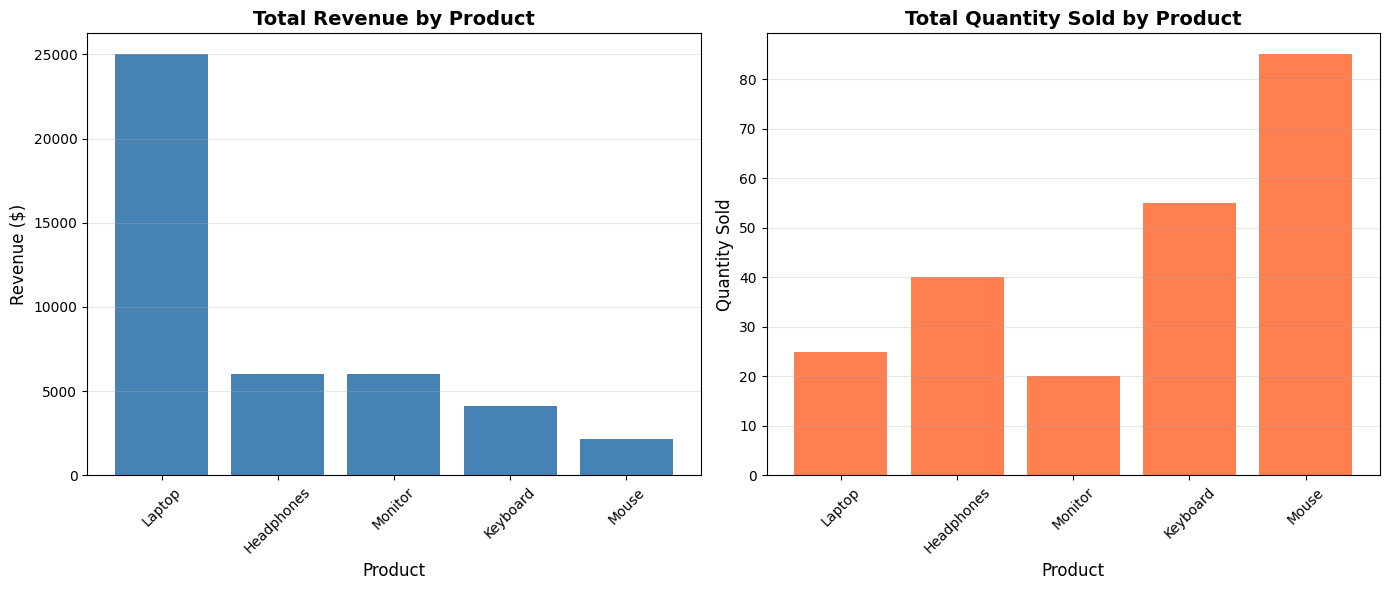

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(df['product'], df['revenue'], color='steelblue')
ax1.set_xlabel('Product', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.set_title('Total Revenue by Product', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

ax2.bar(df['product'], df['total_qty'], color='coral')
ax2.set_xlabel('Product', fontsize=12)
ax2.set_ylabel('Quantity Sold', fontsize=12)
ax2.set_title('Total Quantity Sold by Product', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("sales_chart.png", dpi=300, bbox_inches='tight')
print("\nChart saved as 'sales_chart.png'")

plt.show()

In [22]:
conn.close()